In [1]:
from utils_v1 import *


In [2]:
from icecream import ic

import numpy as np
from src.dataset import (
    MultipleDates,
    PA, PADeforestationTime, PADistanceMap, PAMultipleDates,
    MTDeforestationTime,
    MTMultipleDates
)

# from src.dataset_legacy import MTDeforestationTime
from src import training_generator as generator
from src.patchesHandler import PatchesHandler, PatchesHandlerMultipleDates, PatchesHandlerEvidential

from src.trainer.evidential import TrainerEvidential
import src.trainer.evidential as evidential

from mpl_toolkits.axes_grid1 import make_axes_locatable

import cv2
from src import metrics as _metric


In [3]:
from enum import Enum
UncertaintyMethod = Enum('Predictor', 'pred_var MI pred_entropy KL pred_entropy_single evidential')
uncertaintyMethod = "evidential"


In [4]:

config = {
	"training": False,
	"learning_rate": 1e-3, # 1e-3
	#"learning_rate": 1e-5, # 1e-3	
	"weights": [0.1, 0.9, 0],
	"save_probabilities": False,
	"loadInference": False,
	"addPastDeforestationInput": True,
	"inference_times": 1,
	"Uncertainty": {
		"annealing_step": 10*375 # 1875, 10*375*10
	},
	"uncertainty_method": uncertaintyMethod,
	"evidence_function": evidential.relu_evidence
}

'''
if config["training"] == True:
	dates = [2017, 2018]
else:
	dates = [2018, 2019]
if config["training"] == True:
	dates = [2018, 2019]
else:
	dates = [2019, 2020]
'''
dates = [2018, 2019]
dataset = PAMultipleDates(dates = dates, # dates = [2017, 2018, 2019]. [2018, 2019]. [2015, 2016, 2017, 2018]
	addPastDeforestationInput = config['addPastDeforestationInput'],
	borderBuffer = 2)	
# dates = [2019, 2020]
# dataset = MTMultipleDates(dates = dates, # dates = [2016,2017,2018,2019]
# 	addPastDeforestationInput = config['addPastDeforestationInput'],
# 	borderBuffer = 2)	
# dataset = MTDeforestationTime()	
# [2016, 2017, 2018]

ic(dates)


if issubclass(type(dataset), MultipleDates):
	patchesHandler = PatchesHandlerEvidential(
		dataset)
else:
	patchesHandler = PatchesHandler()

# exp = 170
# exp = 155
exp = 155 # relu
# exp = 171 # softsign
# exp = 177
exp = 185

# if config["training"] == True:
trainer = TrainerEvidential(config, dataset, patchesHandler)

trainer.defineExperiment(exp)


ic| list(self.date_ids): [0]
ic| self.image_channels: [[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]]
ic| dates: [2018, 2019]
ic| self.input_image_shape: 21
ic| self.dataset.image_channels: [[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]]


In [5]:
exp

185

In [6]:
trainer.setExperimentPath()
trainer.createLogFolders()

In [7]:
# ic(type(dataset), exp, dataset.dates)


In [8]:

trainer.loadLabel()

D:/Jorge/datasets/deforestation/Para/deforestation_past_years.tif
Loaded deforestation past years


ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Label where deforestation past years is actual date (2019) = 1


ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Past deforestation different from 0 (no deforestation)


ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Past deforestation before 2008 is 2
D:/Jorge/datasets/deforestation/deforestation_before_2008/deforestation_before_2008_para.tif


ic| np.unique(label_past_deforestation_before_2008, return_counts=True): (array([  0, 215], dtype=uint8), array([124211220,  38957970], dtype=int64))
ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))
ic| label_per_date.shape: (17730, 9203, 1)


Mask label shape:  
 (17730, 9203, 1) 
 Unique values:  
 [0 1 2]


In [9]:

# Creating tile mask
trainer.createTrainValTestTiles()


Tiles size:  3546 2300
Mask size:  (17730, 9200)


In [10]:

trainer.label_mask.dtype

dtype('uint8')

In [11]:

trainer.getLabelCurrentDeforestation()

In [12]:

trainer.loadInputImage()

ic| image_stack.shape: (17730, 9203, 21)


Image shape:  (17730, 9203, 21)
mask:  (17730, 9200)
image stack:  (17730, 9200, 21)
ref : (17730, 9200, 1)


In [13]:

np.unique(trainer.image_stack[...,0], return_counts=True)

(array([0.        , 0.08333334, 0.16666667, 0.25      , 0.33333334,
        0.4166667 , 0.5       , 0.5833334 , 0.6666667 , 0.75      ,
        0.8333334 , 0.9166667 , 1.        ], dtype=float32),
 array([104050616,   2209014,    644713,    968315,   1458862,   1560879,
          2477424,   1299508,    903419,    864429,   4570932,   3150455,
         38957434], dtype=int64))

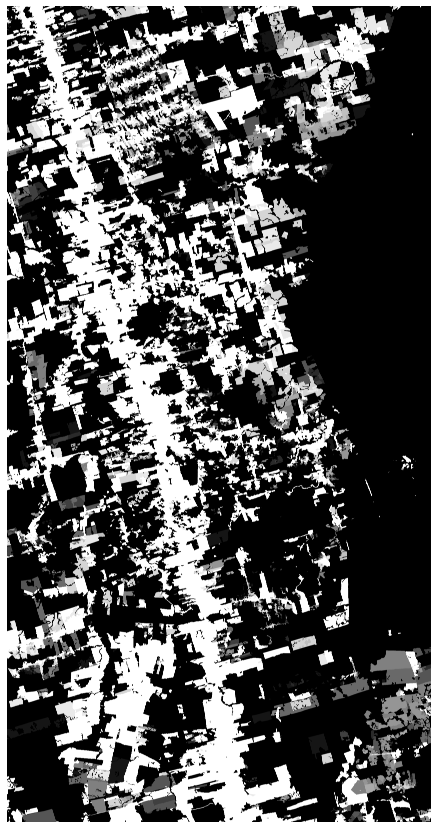

In [14]:

trainer.logger.plotFigure(trainer.image_stack[...,0], 
    name='image_stack_first_channel', cmap=plt.cm.gray, savefig=False)

In [15]:

trainer.getImageChannels()

ic| self.image_stack.shape: (17730, 9200, 21)
ic| self.channels: 21


In [16]:

trainer.getTrainValTestMasks()

Training tiles:  [1, 3, 5, 8, 11, 13, 14, 20]
Validation tiles:  [6, 19]
Test tiles:  [2, 4, 7, 9, 10, 12, 15, 16, 17, 18]


In [17]:

if config["training"] == True:
    # Extracting patches from the idx matrix
    trainer.createIdxImage()


ic| im_idx_row.shape: (17730, 9200, 1)
    im_idx_col.shape: (17730, 9200, 1)
ic| im_idx_row.dtype: dtype('uint16')
    im_idx_col.dtype: dtype('uint16')
ic| im_idx.shape: (17730, 9200, 2), im_idx.dtype: dtype('uint16')


In [18]:
if config["training"] == True:
    trainer.extractCoords()

ic| coords.shape: (464, 239, 1, 128, 128, 2)
    coords.dtype: dtype('uint16')
ic| coords.shape: (110896, 2), coords.dtype: dtype('uint16')


In [19]:
if config["training"] == True:
    trainer.trainTestSplit()

ic| self.coords_train.shape: (41812, 3)
    self.coords_val.shape: (10260, 3)


In [20]:
if config["training"] == True:
    trainer.label_mask.shape

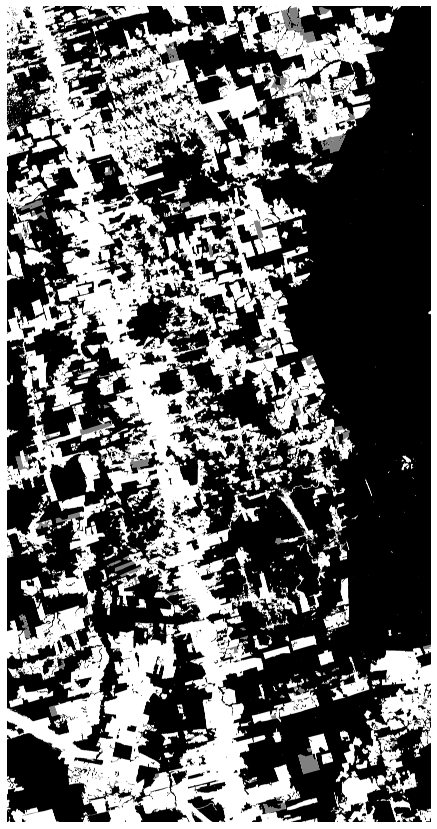

In [21]:
if config["training"] == True:
    if type(dataset) != PADeforestationTime and type(dataset) != MTDeforestationTime:
        trainer.logger.plotFigure(trainer.label_mask[...,-1], 
            name='Reference', cmap=plt.cm.gray, savefig=False)

    else:
        trainer.logger.plotFigure(trainer.label_mask[...,-1], 
            name='Reference', cmap=plt.cm.gray, savefig=False)



In [22]:
if config["training"] == True:
    np.unique(trainer.label_mask)

In [23]:
if config["training"] == True:
    print(trainer.coords_train)

[[    0     0     0]
 [    0    38     0]
 [    0    76     0]
 ...
 [17594  8968     0]
 [17594  9006     0]
 [17594  9044     0]]


In [24]:
if config["training"] == True:
    trainer.retrieveSamplesOfInterest()

training samples:  (3753, 3) validation samples:  (1032, 3)


In [25]:
if config["training"] == True:
    inputSnipShow = True

ic| np.mean(image_patch[...,[1,2,3]]): 0.107682176
    np.mean(image_patch[...,[11,12,13]]): 0.22637562


[12084  2508     0]


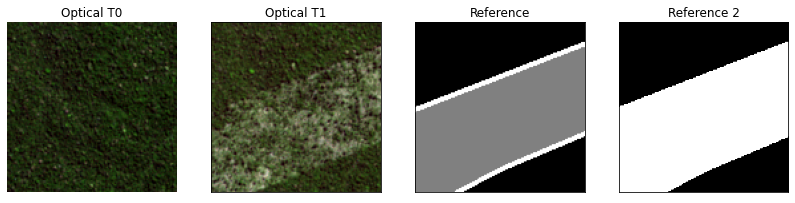

In [26]:
if config["training"] == True:
    if inputSnipShow == True:
        trainer.snipDataset(idx = 2800)


ic| np.mean(image_patch[...,[1,2,3]]): 0.2714837
    np.mean(image_patch[...,[11,12,13]]): 0.30292988
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[ 114 5928    0]


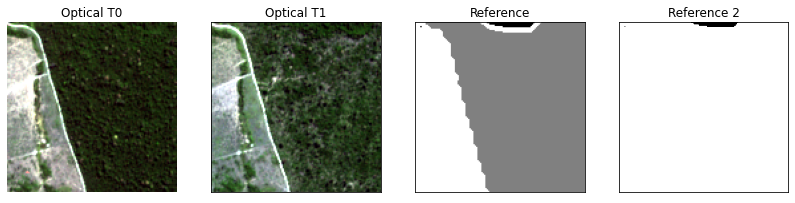

In [27]:
if config["training"] == True:
    if inputSnipShow == True:
        trainer.snipDataset(idx = 97)


ic| np.mean(image_patch[...,[1,2,3]]): 0.15096879
    np.mean(image_patch[...,[11,12,13]]): 0.103304155


[3382 2128    0]


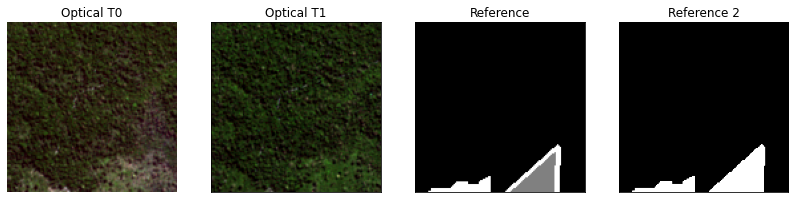

In [28]:
if config["training"] == True:
    if inputSnipShow == True:

        trainer.snipDataset(idx = 1200)

ic| np.mean(

[ 608 6574    0]


image_patch[...,[1,2,3]]): 0.09604081
    np.mean(image_patch[...,[11,12,13]]): 0.23388559


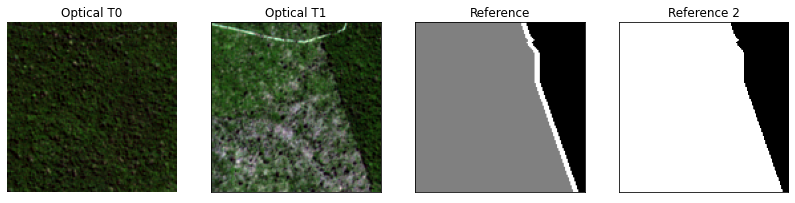

In [29]:
if config["training"] == True:
    if inputSnipShow == True:

        trainer.snipDataset(idx = 400)

In [30]:
if config["training"] == True:
    trainer.getGenerators()


In [31]:
if config["training"] == True:
    trainer.fixChannelNumber()

In [32]:
if config["training"] == True:
    print(trainer.path_exp)

D:/Jorge/datasets/deforestation/experiments/exp185


In [33]:
if config["training"] == True:
    print(trainer.channels)

21


In [34]:
if config["training"] == True:
    print(trainer.image_stack.shape)

(17730, 9200, 21)


In [35]:
# trainer.weights = [0.01, 0.99, 0]
trainer.weights

[0.1, 0.9, 0]

### Evidential metrics

In [36]:
if config["training"] == True:
    trainer.train()

time:  0
Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_enc_net (InputLayer)      [(None, 128, 128, 21 0                                            
__________________________________________________________________________________________________
res1_net1 (Conv2D)              (None, 128, 128, 16) 3040        input_enc_net[0][0]              
__________________________________________________________________________________________________
drop_net1 (Dropout)             (None, 128, 128, 16) 0           res1_net1[0][0]                  
__________________________________________________________________________________________________
res2_net1 (Conv2D)              (None, 128, 128, 16) 2320        drop_net1[0][0]                  
_____________________________________________________________________________________

c:\Users\jchamorro\Anaconda3\envs\tf2\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(
c:\Users\jchamorro\Anaconda3\envs\tf2\lib\site-packages\tensorflow\python\keras\engine\training.py:1969: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/100
self.global_step 0.0
alpha Tensor("loss/add:0", shape=(None, 128, 128, 3), dtype=float32)
u Tensor("loss/truediv:0", shape=(None, 128, 128, 1), dtype=float32)
alpha Tensor("add:0", shape=(None, 128, 128, 3), dtype=float32)
u Tensor("truediv:0", shape=(None, 128, 128, 1), dtype=float32)
K.int_shape(KL_reg) Tensor("mul_6:0", shape=(None, 128, 128, 1), dtype=float32)
alpha Tensor("add_7:0", shape=(None, 128, 128, 3), dtype=float32)
u Tensor("truediv_5:0", shape=(None, 128, 128, 1), dtype=float32)
K.int_shape(KL_reg) Tensor("mul_12:0", shape=(None, 128, 128, 1), dtype=float32)
alpha Tensor("loss/add:0", shape=(None, 128, 128, 3), dtype=float32)
u Tensor("loss/truediv:0", shape=(None, 128, 128, 1), dtype=float32)
alpha Tensor("add:0", shape=(None, 128, 128, 3), dtype=float32)
u Tensor("truediv:0", shape=(None, 128, 128, 1), dtype=float32)
K.int_shape(KL_reg) Tensor("mul_6:0", shape=(None, 128, 128, 1), dtype=float32)
alpha Tensor("add_7:0", shape=(None, 128, 128, 3), dtype=float

c:\Users\jchamorro\Anaconda3\envs\tf2\lib\site-packages\tensorflow\python\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


351/351 [==============================] - 32s 91ms/step - loss: 0.0441 - accuracy: 0.9275 - KL_term: 0.0128 - loglikelihood_term: 0.1193 - evidential_success: 81.5648 - evidential_fail: 11.5821 - acc: 0.9277 - annealing_coef: 0.0933 - global_step_get: 350.0000 - annealing_step_get: 3750.0000 - val_loss: 0.0479 - val_accuracy: 0.9271 - val_KL_term: 0.0186 - val_loglikelihood_term: 0.1236 - val_evidential_success: 55.0858 - val_evidential_fail: 5.3585 - val_acc: 0.9277 - val_annealing_coef: 0.1867 - val_global_step_get: 700.0000 - val_annealing_step_get: 3750.0000

Epoch 00002: val_loss did not improve from 0.04699
Epoch 3/100
self.global_step 700.0
351/351 [==============================] - 32s 91ms/step - loss: 0.0425 - accuracy: 0.9327 - KL_term: 0.0145 - loglikelihood_term: 0.1128 - evidential_success: 97.0333 - evidential_fail: 9.5560 - acc: 0.9327 - annealing_coef: 0.1400 - global_step_get: 525.0000 - annealing_step_get: 3750.0000 - val_loss: 0.0497 - val_accuracy: 0.9297 - val_KL

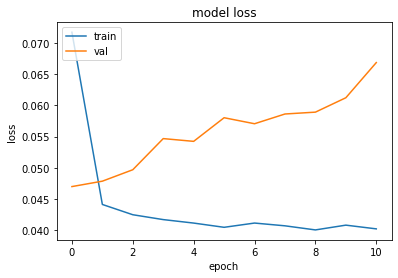

In [37]:
if config["training"] == True:
    trainer.plotHistory()


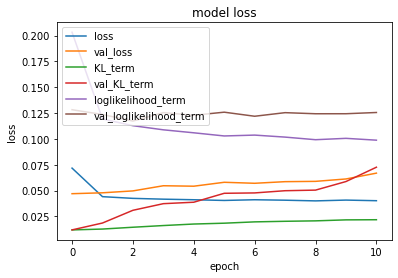

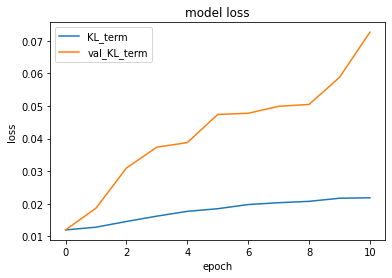

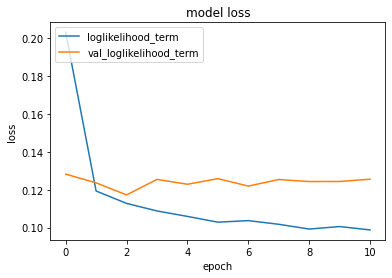

In [38]:
if config["training"] == True:
    trainer.plotLossTerms()

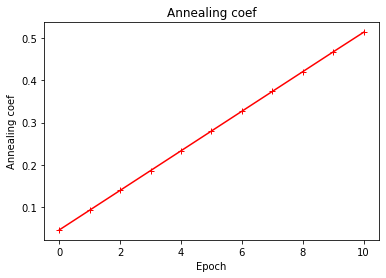

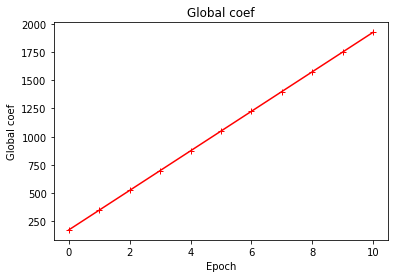

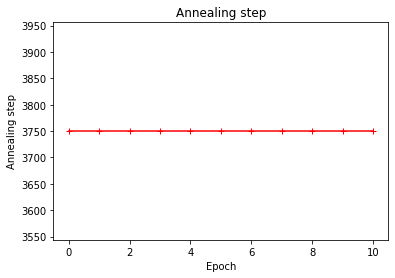

In [39]:
if config["training"] == True:
    trainer.plotAnnealingCoef()

In [40]:
def draw_EDL_results(K, history):
    # train_acc1, train_ev_s, train_ev_f, test_acc1, test_ev_s, test_ev_f 
    # calculate uncertainty for training and testing data for correctly and misclassified samples
    '''
    K: known classes
    '''
    train_u_succ = K / (K+np.array(history['evidential_success']))
    train_u_fail = K / (K+np.array(history['evidential_fail']))
    test_u_succ  = K / (K+np.array(history['val_evidential_success']))
    test_u_fail  = K / (K+np.array(history['val_evidential_fail']))
    
    f, axs = plt.subplots(2, 2)
    f.set_size_inches([10,10])
    
    axs[0,0].plot(history['evidential_success'],c='r',marker='+')
    axs[0,0].plot(history['evidential_fail'],c='k',marker='x')
    axs[0,0].set_title('Train Data')
    axs[0,0].set_xlabel('Epoch')
    axs[0,0].set_ylabel('Estimated total evidence for classification') 
    axs[0,0].legend(['Correct Clasifications','Misclasifications'])
    
    axs[0,1].plot(train_u_succ,c='r',marker='+')
    axs[0,1].plot(train_u_fail,c='k',marker='x')
    axs[0,1].plot(history['acc'],c='blue',marker='*')
    axs[0,1].set_title('Train Data')
    axs[0,1].set_xlabel('Epoch')
    axs[0,1].set_ylabel('Estimated uncertainty for classification')
    axs[0,1].legend(['Correct clasifications','Misclasifications', 'Accuracy'])
    
    axs[1,0].plot(history['val_evidential_success'],c='r',marker='+')
    axs[1,0].plot(history['val_evidential_fail'],c='k',marker='x')
    axs[1,0].set_title('Test Data')
    axs[1,0].set_xlabel('Epoch')
    axs[1,0].set_ylabel('Estimated total evidence for classification') 
    axs[1,0].legend(['Correct Clasifications','Misclasifications'])
    
    axs[1,1].plot(test_u_succ,c='r',marker='+')
    axs[1,1].plot(test_u_fail,c='k',marker='x')
    axs[1,1].plot(history['val_acc'],c='blue',marker='*')
    axs[1,1].set_title('Test Data')
    axs[1,1].set_xlabel('Epoch')
    axs[1,1].set_ylabel('Estimated uncertainty for classification')
    axs[1,1].legend(['Correct clasifications','Misclasifications', 'Accuracy'])
    

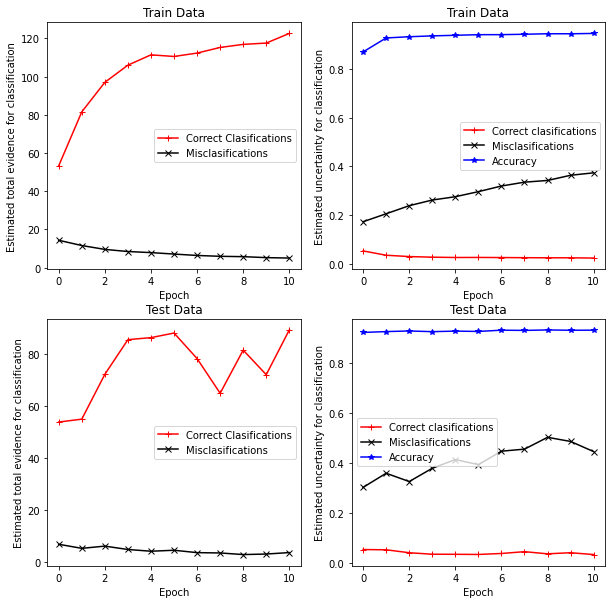

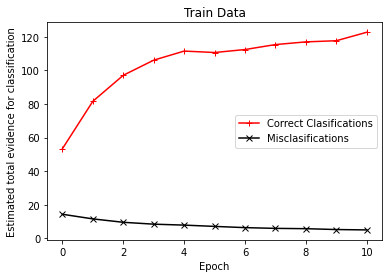

In [41]:
if config["training"] == True:
    draw_EDL_results(trainer.class_n, trainer.history.history)

    plt.figure(5)
    plt.plot(trainer.history.history['evidential_success'],c='r',marker='+')
    plt.plot(trainer.history.history['evidential_fail'],c='k',marker='x')
    plt.title('Train Data')
    plt.xlabel('Epoch')
    plt.ylabel('Estimated total evidence for classification') 
    plt.legend(['Correct Clasifications','Misclasifications'])


In [42]:
trainer.image_stack.shape

(17730, 9200, 21)

In [43]:
if type(trainer.dataset) != PADeforestationTime and type(trainer.dataset) != MTDeforestationTime:
    trainer.patchesHandler.dataset.image_channels[-1]

In [44]:
if issubclass(type(dataset), MultipleDates):
	trainer.channels = trainer.patchesHandler.input_image_shape
	trainer.image_stack = trainer.image_stack[..., trainer.patchesHandler.dataset.image_channels[-1]]
	trainer.label_mask = trainer.label_mask[...,-1]

In [45]:
trainer.image_stack.shape

(17730, 9200, 21)

In [46]:
trainer.setPadding()

-30.0 -16.0


In [47]:
trainer.infer()

ic| self.path_models+ '/' + self.method +'_'+str(0)+'.h5': 'D:/Jorge/datasets/deforestation/experiments/exp185/models/resunet_0.h5'


time:  0


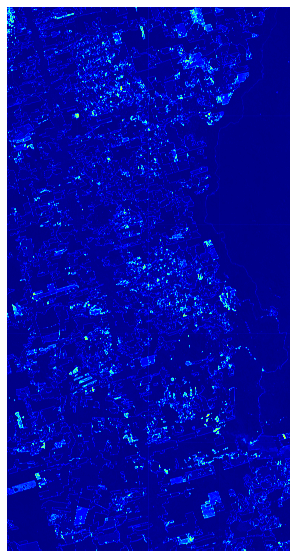

In [48]:
trainer.logger.plotFigure(trainer.u_reconstructed, 
            name='Uncertainty', cmap='jet', savefig=False, figsize=(10,10))

In [49]:
trainer.loadPredictedProbabilities()


In [50]:
trainer.prob_rec.shape

(17760, 9216)

In [51]:
trainer.getMeanProb()

In [52]:
trainer.logger.getStats(trainer.mean_prob)

ic| np.min(value): 0.0057120807
    np.mean(value): 0.028393185
    np.max(value): 0.95011073


In [53]:
ic(trainer.mean_prob.shape)

ic| trainer.mean_prob.shape: (17760, 9216)


(17760, 9216)

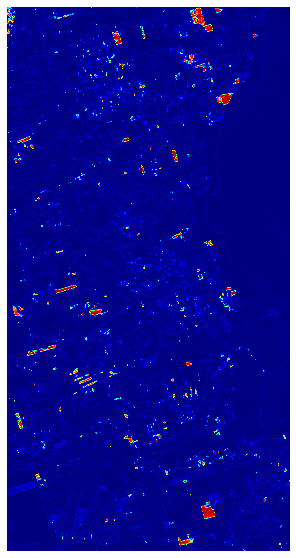

In [54]:
trainer.unpadMeanProb()
trainer.logger.plotFigure(trainer.mean_prob, 
            name='Mean predicted probability', figsize=(10,10), cmap='jet', savefig=False)

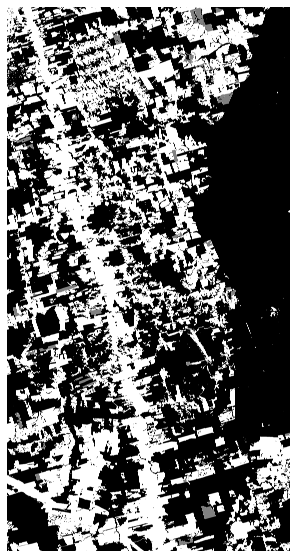

In [55]:
trainer.logger.plotFigure(trainer.label_mask, 
            name='Reference mask', figsize=(10,10), cmap=plt.cm.gray, savefig=True)

In [56]:
trainer.squeezeLabel()

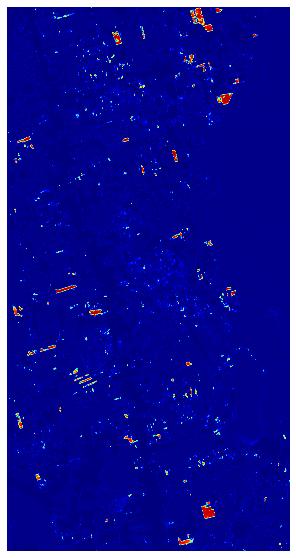

In [57]:
trainer.setMeanProbNotConsideredAreas()
trainer.logger.plotFigure(trainer.mean_prob, 
            name='Mean predicted probability', figsize=(10,10), cmap='jet', savefig=False)

In [58]:
trainer.logger.getStats(trainer.mean_prob)

ic| np.min(value): 0.0
    np.mean(value): 0.021466587
    np.max(value): 0.95011073


In [59]:
print(trainer.label_mask.shape)

(17730, 9200)


In [60]:
trainer.getLabelTest()

(54236371,)
(array([0, 1], dtype=uint8), array([53470765,   765606], dtype=int64))


In [61]:
trainer.getMAP()

86.95


In [62]:
trainer.prob_rec.shape

(17760, 9216)

In [63]:
trainer.preprocessProbRec()
print(trainer.prob_rec.shape)

(17760, 9216, 1)


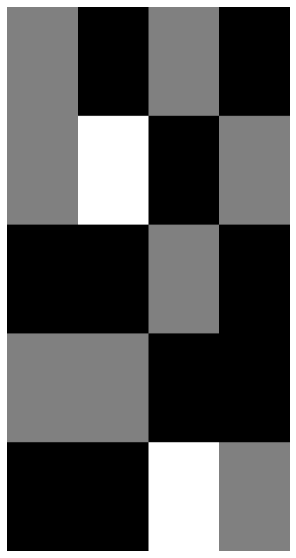

In [64]:
trainer.logger.plotFigure(trainer.mask_tr_val, 
            name=trainer.dataset.site + trainer.title_name + ' Train val mask.png', figsize=(10,10), savefig=False)

In [65]:
trainer.getLabelCurrentDeforestation()

In [66]:
trainer.applyProbabilityThreshold()

(17730, 9200)
(array([0., 1.], dtype=float32), array([161187386,   1928614], dtype=int64))


ic| self.predicted_unpad.shape: (17730, 9200)
    self.predicted.shape: (17730, 9200)


In [67]:
trainer.getTestValues()

ic| predicted_test.shape: (81558000,)
ic| predicted_test.shape: (54236371,)


In [68]:
trainer.removeSmallPolygons()

ic| np.unique(predicted, return_counts=True): (array([0., 1.], dtype=float32), array([161187386,   1928614], dtype=int64))
    np.unique(predicted_larger_than_min_area, return_counts=True): (array([0., 1.], dtype=float32), array([161389571,   1726429], dtype=int64))
ic| np.unique(ignored_polygons, return_counts=True): (array([0., 1.], dtype=float32), array([162913815,    202185], dtype=int64))


In [69]:
trainer.calculateMetrics()

ic| self.f1: 81.93, self.precision: 82.94, self.recall: 80.94


In [70]:
trainer.getValidationValuesForMetrics()
trainer.calculateMetricsValidation()

ic| self.label_mask_val.shape: (16311600,)
ic| self.label_mask_val_valid.shape: (9428722,)
ic| f1_val: 87.35
    precision_val: 85.06
    recall_val: 89.76
    mAP_val: 93.6


In [71]:
calculateMAPWithoutSmallPolygons = False
if calculateMAPWithoutSmallPolygons == True:
    trainer.calculateMAPWithoutSmallPolygons()

In [72]:
trainer.getErrorMask()

(array([0., 1.], dtype=float32), array([162443263,    672737], dtype=int64))


In [73]:
'''

import types

trainer.getErrorMaskToShowRGB = types.MethodType(getErrorMaskToShowRGB, trainer)
'''


'\n\nimport types\n\ntrainer.getErrorMaskToShowRGB = types.MethodType(getErrorMaskToShowRGB, trainer)\n'

In [74]:
trainer.getErrorMaskToShowRGB()

[0. 1.]


In [75]:
predicted_unpad_to_show = trainer.predicted_unpad.copy()

predicted_unpad_to_show[trainer.label_mask == 2] = 0
print(np.unique(predicted_unpad_to_show))

[0. 1.]


In [76]:
predicted_unpad_to_show.shape

(17730, 9200)

In [77]:

'''
trainer.logger.plotFigure = types.MethodType(trainer.logger.plotFigure, trainer)
'''

'\ntrainer.logger.plotFigure = types.MethodType(trainer.logger.plotFigure, trainer)\n'

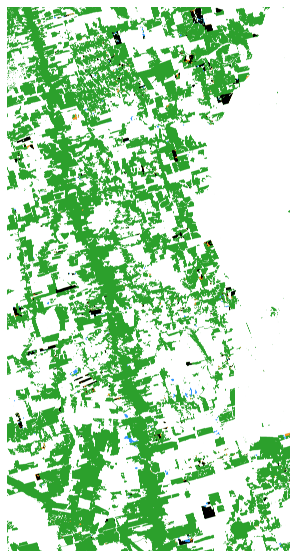

In [78]:
trainer.logger.plotFigure(trainer.error_mask_to_show_rgb[...,::-1], 
            name=trainer.dataset.site + trainer.title_name + ' error mask color.png', 
            figsize=(10,10), savefig=True, dpi=300)

In [79]:
trainer.setUncertainty()

In [80]:
trainer.getValidationValues2()
trainer.getTestValues2()

ic| self.label_mask.shape: (17730, 9200)
ic| self.mask_amazon_ts.shape: (17730, 9200)
ic| self.label_mask_test.shape: (81558000,)
ic| self.error_mask_test.shape: (54134001,)


In [81]:
trainer.getUncertaintyToShow()
trainer.logger.getStats(trainer.uncertainty_to_show)


ic| np.min(value): 0.0
    np.mean(value): 0.036941707
    np.max(value): 1.0


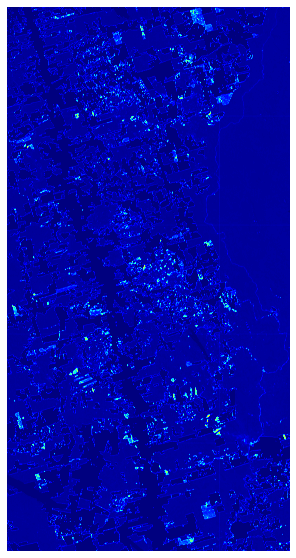

In [82]:
trainer.logger.plotFigure(trainer.uncertainty_to_show, 
            name=trainer.dataset.site + trainer.title_name + ' uncertainty evidential learning.png', figsize=(10,10), cmap='jet', savefig=True)

ic| trainer.dataset.previewLims1: array([2200, 3200, 6900, 7900])
    trainer.dataset.previewLims2: array([ 500, 1500, 3500, 4500])
ic| np.unique(trainer.mask_amazon_ts[lims[0]:lims[1], lims[2]:lims[3]]): array([1], dtype=uint8)
ic| np.unique(trainer.mask_amazon_ts[lims[0]:lims[1], lims[2]:lims[3]], return_counts=True): (array([1], dtype=uint8), array([1000000], dtype=int64))
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


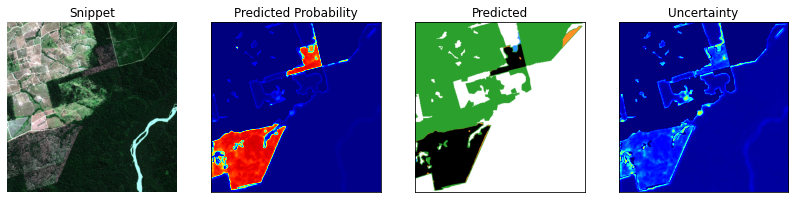

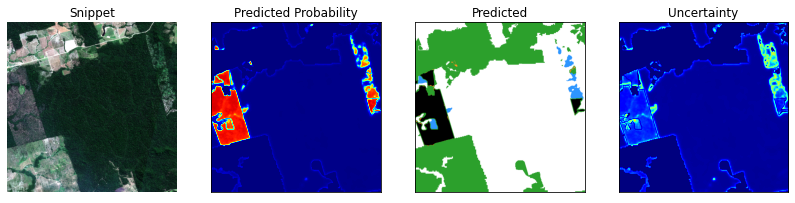

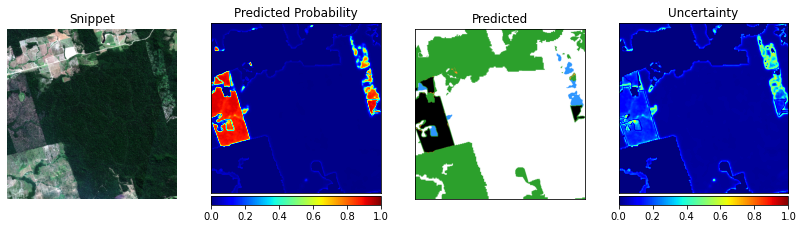

In [83]:
trainer.logger.plotCropSample(trainer)

In [84]:
trainer.logger.getStats(trainer.uncertainty)

ic| np.min(value): 0.017136242
    np.mean(value): 0.054349247
    np.max(value): 1.0


In [85]:
import matplotlib.tri as tri

corners = np.array([[0, 0], [1, 0], [0.5, 0.75**0.5]])
AREA = 0.5 * 1 * 0.75**0.5
triangle = tri.Triangulation(corners[:, 0], corners[:, 1])

# For each corner of the triangle, the pair of other corners
pairs = [corners[np.roll(range(3), -i)[1:]] for i in range(3)]
# The area of the triangle formed by point xy and another pair or points
tri_area = lambda xy, pair: 0.5 * np.linalg.norm(np.cross(*(pair - xy)))

def xy2bc(xy, tol=1.e-4):
    '''Converts 2D Cartesian coordinates to barycentric.'''
    coords = np.array([tri_area(xy, p) for p in pairs]) / AREA
    return np.clip(coords, tol, 1.0 - tol)

class Dirichlet(object):
    def __init__(self, alpha):
        from math import gamma
        from operator import mul
        self._alpha = np.array(alpha)
        self._coef = gamma(np.sum(self._alpha)) / \
                           np.multiply.reduce([gamma(a) for a in self._alpha])
    def pdf(self, x):
        '''Returns pdf value for `x`.'''
        from operator import mul
        return self._coef * np.multiply.reduce([xx ** (aa - 1)
                                               for (xx, aa)in zip(x, self._alpha)])
    
def draw_pdf_contours(dist, nlevels=200, subdiv=8, **kwargs):
    import math

    refiner = tri.UniformTriRefiner(triangle)
    trimesh = refiner.refine_triangulation(subdiv=subdiv)
    pvals = [dist.pdf(xy2bc(xy)) for xy in zip(trimesh.x, trimesh.y)]

    plt.tricontourf(trimesh, pvals, nlevels, cmap='jet', **kwargs)
    plt.axis('equal')
    plt.xlim(0, 1)
    plt.ylim(0, 0.75**0.5)
    plt.axis('off')
def getMassFcn(self, alpha = [5, 5, 5]):
        draw_pdf_contours(Dirichlet(alpha))


In [86]:

import types

trainer.getMassFcn = types.MethodType(getMassFcn, trainer)


In [87]:
from sklearn import metrics
def getUncertaintyMetrics(self):
    predicted_thresholded = np.zeros_like(self.uncertainty).astype(np.int8)
    predicted_thresholded[self.uncertainty * 2.8 >= np.max(self.predicted_test,axis=-1)] = 1
    print(np.unique(predicted_thresholded, return_counts=True))

    predicted_test_classified_correct = self.predicted_test[
            predicted_thresholded == 0]
    label_current_deforestation_test_classified_correct = self.label_mask_current_deforestation_test[
            predicted_thresholded == 0]


    predicted_test_classified_incorrect = self.predicted_test[
            predicted_thresholded == 1]
    label_current_deforestation_test_classified_incorrect = self.label_mask_current_deforestation_test[
            predicted_thresholded == 1]

    uncertainty_classified_correct = self.uncertainty[
            predicted_thresholded == 0]
    uncertainty_classified_incorrect = self.uncertainty[
            predicted_thresholded == 1]
    print(np.min(uncertainty_classified_correct), np.mean(uncertainty_classified_correct), np.max(uncertainty_classified_correct))
    print(np.min(uncertainty_classified_incorrect), np.mean(uncertainty_classified_incorrect), np.max(uncertainty_classified_incorrect))

    print(label_current_deforestation_test_classified_correct.shape,
            predicted_test_classified_correct.shape)
    cm_correct = metrics.confusion_matrix(
            label_current_deforestation_test_classified_correct,
            predicted_test_classified_correct)
    print("cm_correct", cm_correct)

    TN_L = cm_correct[0,0]
    FN_L = cm_correct[1,0]
    TP_L = cm_correct[1,1]
    FP_L = cm_correct[0,1]

    ic(label_current_deforestation_test_classified_incorrect.shape,
            predicted_test_classified_incorrect.shape)

    cm_incorrect = metrics.confusion_matrix(
            label_current_deforestation_test_classified_incorrect,
            predicted_test_classified_incorrect)

    print("cm_incorrect", cm_incorrect)

    if cm_incorrect.shape[0] != 2: 
            ic(np.all(label_current_deforestation_test_classified_incorrect) == 0) 
            ic(np.all(predicted_test_classified_incorrect) == 0) 
            
            precision_L = np.nan 
            recall_L = np.nan 
            recall_Ltotal = np.nan 
            AA = len(label_current_deforestation_test_classified_incorrect) / len(self.label_mask_current_deforestation_test) 
            precision_H = np.nan 
            recall_H = np.nan 
    else:
                    
            TN_H = cm_incorrect[0,0]
            FN_H = cm_incorrect[1,0]
            TP_H = cm_incorrect[1,1]
            FP_H = cm_incorrect[0,1]
            
            precision_L = TP_L / (TP_L + FP_L)
            recall_L = TP_L / (TP_L + FN_L)
            
            precision_H = TP_H / (TP_H + FP_H)
            recall_H = TP_H / (TP_H + FN_H)
            
            recall_Ltotal = TP_L / (TP_L + FN_L + TP_H + FN_H)
            ic((TP_H + FN_H + FP_H + TN_H), len(self.label_mask_current_deforestation_test))
            AA = (TP_H + FN_H + FP_H + TN_H) / len(self.label_mask_current_deforestation_test)
            ic((TP_H + FN_H + FP_H + TN_H), len(self.label_mask_current_deforestation_test))


    self.m = {'precision_L': precision_L,
            'recall_L': recall_L,
            'recall_Ltotal': recall_Ltotal,
            'AA': AA,
            'precision_H': precision_H,
            'recall_H': recall_H}

    self.m['f1_L'] = 2*self.m['precision_L']*self.m['recall_L']/(self.m['precision_L']+self.m['recall_L'])
    self.m['f1_H'] = 2*self.m['precision_H']*self.m['recall_H']/(self.m['precision_H']+self.m['recall_H'])


In [88]:

import types

trainer.getUncertaintyMetrics = types.MethodType(getUncertaintyMetrics, trainer)


In [89]:
trainer.getUncertaintyMetrics()

(array([0, 1], dtype=int8), array([53160166,   973835], dtype=int64))
0.017136242 0.046545677 0.35714275
0.35714287 0.4803289 1.0
(53160166,) (53160166,)


ic| label_current_deforestation_test_classified_incorrect.shape: (973835,)
    predicted_test_classified_incorrect.shape: (973835,)
ic| TP_H + FN_H + FP_H + TN_H: 973835
    len(self.label_mask_current_deforestation_test): 54134001
ic| TP_H + FN_H + FP_H + TN_H: 973835
    len(self.label_mask_current_deforestation_test): 54134001


cm_correct [[52515472    62219]
 [   51250   531225]]
cm_incorrect [[761515  60085]
 [ 88780  63455]]


In [90]:
trainer.m

{'precision_L': 0.8951560720135345,
 'recall_L': 0.9120133911326667,
 'recall_Ltotal': 0.723040383280478,
 'AA': 0.017989340931958826,
 'precision_H': 0.5136393071070099,
 'recall_H': 0.4168226754688475,
 'f1_L': 0.9035061088391293,
 'f1_H': 0.46019399873084943}

In [91]:
print(trainer.uncertainty.shape, trainer.predicted_test.shape)
print(trainer.uncertainty.dtype, trainer.predicted_test.dtype)
print(np.unique(trainer.predicted_test))
print(trainer.label_mask_current_deforestation_test.shape)


(54134001,) (54134001,)
float32 float32
[0. 1.]
(54134001,)


In [92]:
trainer.mean_prob[trainer.mask_amazon_ts == 1].shape

(81558000,)

In [93]:
uncertainty_test_correct = trainer.uncertainty[trainer.predicted_test == trainer.label_mask_current_deforestation_test]
uncertainty_test_incorrect = trainer.uncertainty[trainer.predicted_test != trainer.label_mask_current_deforestation_test]

predicted_test_correct = trainer.uncertainty[trainer.predicted_test == trainer.label_mask_current_deforestation_test]
uncertainty_test_incorrect = trainer.uncertainty[trainer.predicted_test != trainer.label_mask_current_deforestation_test]


In [94]:
print(np.min(uncertainty_test_correct), np.mean(uncertainty_test_correct), np.max(uncertainty_test_correct))
print(np.min(uncertainty_test_incorrect), np.mean(uncertainty_test_incorrect), np.max(uncertainty_test_incorrect))


0.017136242 0.052741226 1.0
0.02577261 0.38456056 1.0


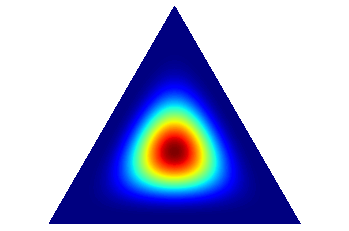

In [95]:
trainer.getMassFcn()

In [96]:
trainer.m

{'precision_L': 0.8951560720135345,
 'recall_L': 0.9120133911326667,
 'recall_Ltotal': 0.723040383280478,
 'AA': 0.017989340931958826,
 'precision_H': 0.5136393071070099,
 'recall_H': 0.4168226754688475,
 'f1_L': 0.9035061088391293,
 'f1_H': 0.46019399873084943}

In [97]:
trainer.getUncertaintyAAValues()

ic| self.uncertainty.shape: (54134001,)
    self.label_mask_current_deforestation_test.shape: (54134001,)


[0.13, 0.15, 0.2, 0.225, 0.25, 0.27, 0.3, 0.34, 0.36, 0.45, 0.55, 0.65, 0.8]
threshold 0.13
(49371628,) (49371628,)


ic| label_current_deforestation_test_classified_incorrect.shape: (4762373,)
    predicted_test_classified_incorrect.shape: (4762373,)


cm_correct [[49276334        0]
 [   17374    77920]]


ic| TP_H + FN_H + FP_H + TN_H: 4762373
    len(label_mask_current_deforestation_test): 54134001
ic| TP_H + FN_H + FP_H + TN_H: 4762373
    len(label_mask_current_deforestation_test): 54134001


cm_incorrect [[4000653  122304]
 [ 122656  516760]]
[1.         0.81768002 0.10605545 0.08797379 0.80862011 0.80817496]
threshold 0.15
(49986166,) (49986166,)


ic| label_current_deforestation_test_classified_incorrect.shape: (4147835,)
    predicted_test_classified_incorrect.shape: (4147835,)


cm_correct [[49790125      170]
 [   19943   175928]]


ic| TP_H + FN_H + FP_H + TN_H: 4147835
    len(label_mask_current_deforestation_test): 54134001
ic| TP_H + FN_H + FP_H + TN_H: 4147835
    len(label_mask_current_deforestation_test): 54134001


cm_incorrect [[3486862  122134]
 [ 120087  418752]]
[0.99903463 0.89818299 0.2394523  0.07662162 0.77419641 0.77713751]
threshold 0.2
(51143099,) (51143099,)


ic| label_current_deforestation_test_classified_incorrect.shape: (2990902,)
    predicted_test_classified_incorrect.shape: (2990902,)


cm_correct [[50766366     4127]
 [   27115   345491]]


ic| TP_H + FN_H + FP_H + TN_H: 2990902
    len(label_mask_current_deforestation_test): 54134001
ic| TP_H + FN_H + FP_H + TN_H: 2990902
    len(label_mask_current_deforestation_test): 54134001


cm_incorrect [[2510621  118177]
 [ 112915  249189]]
[0.98819569 0.92722876 0.47024132 0.05524997 0.67831264 0.6881697 ]
threshold 0.225
(51597783,) (51597783,)


ic| label_current_deforestation_test_classified_incorrect.shape: (2536218,)
    predicted_test_classified_incorrect.shape: (2536218,)


cm_correct [[51163224     9395]
 [   30892   394272]]


ic| TP_H + FN_H + FP_H + TN_H: 2536218
    len(label_mask_current_deforestation_test): 54134001
ic| TP_H + FN_H + FP_H + TN_H: 2536218
    len(label_mask_current_deforestation_test): 54134001


cm_incorrect [[2113763  112909]
 [ 109138  200408]]
[0.97672587 0.92734098 0.53663622 0.04685074 0.63963334 0.64742558]
threshold 0.25
(52012673,) (52012673,)


ic| label_current_deforestation_test_classified_incorrect.shape: (2121328,)
    predicted_test_classified_incorrect.shape: (2121328,)


cm_correct [[51527242    18212]
 [   34721   432498]]


ic| TP_H + FN_H + FP_H + TN_H: 2121328
    len(label_mask_current_deforestation_test): 54134001
ic| TP_H + FN_H + FP_H + TN_H: 2121328
    len(label_mask_current_deforestation_test): 54134001


cm_incorrect [[1749745  104092]
 [ 105309  162182]]
[0.95959264 0.92568581 0.58866492 0.03918661 0.60907937 0.60630825]
threshold 0.27
(52308646,) (52308646,)


ic| label_current_deforestation_test_classified_incorrect.shape: (1825355,)
    predicted_test_classified_incorrect.shape: (1825355,)


cm_correct [[51785208    27433]
 [   37959   458046]]


ic| TP_H + FN_H + FP_H + TN_H: 1825355
    len(label_mask_current_deforestation_test): 54134001
ic| TP_H + FN_H + FP_H + TN_H: 1825355
    len(label_mask_current_deforestation_test): 54134001


cm_incorrect [[1491779   94871]
 [ 102071  136634]]
[0.94349292 0.92347053 0.62343782 0.0337192  0.59019892 0.57239689]
threshold 0.3
(52676644,) (52676644,)


ic| label_current_deforestation_test_classified_incorrect.shape: (1457357,)
    predicted_test_classified_incorrect.shape: (1457357,)
ic| TP_H + FN_H + FP_H + TN_H: 1457357
    len(label_mask_current_deforestation_test): 54134001
ic| TP_H + FN_H + FP_H +

cm_correct [[52105148    39847]
 [   42796   488853]]
cm_incorrect [[1171839   82457]
 [  97234  105827]]


 TN_H: 1457357
    len(label_mask_current_deforestation_test): 54134001


[0.92463212 0.91950328 0.66536865 0.02692129 0.5620605  0.52115867]
threshold 0.34
(53040096,) (53040096,)


ic| label_current_deforestation_test_classified_incorrect.shape: (1093905,)
    predicted_test_classified_incorrect.shape: (1093905,)
ic| TP_H + FN_H + FP_H + TN_H: 1093905
    len(label_mask_current_deforestation_test): 54134001
ic| TP_H + FN_H + FP_H + TN_H: 1093905
    len(label_mask_current_deforestation_test): 54134001


cm_correct [[52415523    55195]
 [   48704   520674]]
cm_incorrect [[861464  67109]
 [ 91326  74006]]
[0.90415355 0.91446104 0.70867962 0.02020736 0.52443752 0.44762055]
threshold 0.36
(53178230,) (53178230,)


ic| label_current_deforestation_test_classified_incorrect.shape: (955771,)
    predicted_test_classified_incorrect.shape: (955771,)
ic| TP_H + FN_H + FP_H + TN_H: 955771
    len(label_mask_current_deforestation_test): 54134001
ic| TP_H + FN_H + FP_H + TN_H: 955771
    len(label_mask_current_deforestation_test): 54134001


cm_correct [[52530208    63459]
 [   51666   532897]]
cm_incorrect [[746779  58845]
 [ 88364  61783]]
[0.89358873 0.91161603 0.72531611 0.01765565 0.51217794 0.41148341]
threshold 0.45
(53590882,) (53590882,)


ic| label_current_deforestation_test_classified_incorrect.shape: (543119,)
    predicted_test_classified_incorrect.shape: (543119,)
ic| TP_H + FN_H + FP_H + TN_H: 543119
    len(label_mask_current_deforestation_test): 54134001
ic| TP_H + FN_H + FP_H + TN_H: 543119
    len(label_mask_current_deforestation_test): 54134001


cm_correct [[52852230    96768]
 [   67540   574344]]
cm_incorrect [[424757  25536]
 [ 72490  20336]]
[0.85580946 0.8947785  0.78172885 0.01003286 0.44332054 0.21907655]
threshold 0.55
(53910165,) (53910165,)


ic| label_current_deforestation_test_classified_incorrect.shape: (223836,)
    predicted_test_classified_incorrect.shape: (223836,)
ic| TP_H + FN_H + FP_H + TN_H: 223836
    len(label_mask_current_deforestation_test): 54134001
ic| TP_H + FN_H + FP_H + TN_H: 223836
    len(label_mask_current_deforestation_test): 54134001


cm_correct [[53097321   118313]
 [  102259   592272]]
cm_incorrect [[179666   3991]
 [ 37771   2408]]
[0.83349916 0.85276539 0.80613031 0.00413485 0.3763088  0.05993181]
threshold 0.65
(54090449,) (54090449,)


ic| label_current_deforestation_test_classified_incorrect.shape: (43552,)
    predicted_test_classified_incorrect.shape: (43552,)
ic| TP_H + FN_H + FP_H + TN_H: 43552
    len(label_mask_current_deforestation_test): 54134001
ic| TP_H + FN_H + FP_H + TN_H: 43552
    len(label_mask_current_deforestation_test): 54134001


cm_correct [[53240990   122165]
 [  132860   594434]]
cm_incorrect [[35997   139]
 [ 7170   246]]
[8.29521113e-01 8.17322843e-01 8.09072968e-01 8.04522097e-04
 6.38961039e-01 3.31715210e-02]
threshold 0.8
(54131881,) (54131881,)


ic| label_current_deforestation_test_classified_incorrect.shape: (2120,)
    predicted_test_classified_incorrect.shape: (2120,)
d:\Jorge\deforestation_uncertainty\src\metrics.py:295: RuntimeWarning: invalid value encountered in longlong_scalars
  precision_H = TP_H / (TP_H + FP_H)
ic| TP_H + FN_H + FP_H + TN_H: 2120
    len(label_mask_current_deforestation_test): 54134001
ic| TP_H + FN_H + FP_H + TN_H: 2120
    len(label_mask_current_deforestation_test): 54134001


cm_correct [[53275324   122304]
 [  139573   594680]]
cm_incorrect [[1663    0]
 [ 457    0]]
[8.29418788e-01 8.09911570e-01 8.09407794e-01 3.91620786e-05
            nan 0.00000000e+00]


In [98]:
trainer.getUncertaintyAAAuditedValues()

ic| self.uncertainty.shape: (54134001,)
    self.label_mask_current_deforestation_test.shape: (54134001,)


threshold 0.13
(54134001,) (54134001,)
cm_audited [[53399291        0]
 [   17374   717336]]
[1.         0.97635257]
threshold 0.15
(54134001,) (54134001,)
cm_audited [[53399121      170]
 [   19943   714767]]
[0.99976222 0.97285596]
threshold 0.2
(54134001,) (54134001,)
cm_audited [[53395164     4127]
 [   27115   707595]]
[0.99420139 0.96309428]
threshold 0.225
(54134001,) (54134001,)
cm_audited [[53389896     9395]
 [   30892   703818]]
[0.98682722 0.95795348]
threshold 0.25
(54134001,) (54134001,)
cm_audited [[53381079    18212]
 [   34721   699989]]
[0.9746422 0.9527419]
threshold 0.27
(54134001,) (54134001,)
cm_audited [[53371858    27433]
 [   37959   696751]]
[0.96211874 0.94833472]
threshold 0.3
(54134001,) (54134001,)
cm_audited [[53359444    39847]
 [   42796   691914]]
[0.94554643 0.94175117]
threshold 0.34
(54134001,) (54134001,)
cm_audited [[53344096    55195]
 [   48704   686006]]
[0.92553302 0.9337099 ]
threshold 0.36
(54134001,) (54134001,)
cm_audited [[53335832    634

ic| metric_values_audited: array([[1.        , 0.97635257],
                                  [0.99976222, 0.97285596],
                                  [0.99420139, 0.96309428],
                                  [0.98682722, 0.95795348],
                                  [0.9746422 , 0.9527419 ],
                                  [0.96211874, 0.94833472],
                                  [0.94554643, 0.94175117],
                                  [0.92553302, 0.9337099 ],
                                  [0.91499163, 0.92967838],
                                  [0.87333003, 0.90807257],
                                  [0.84240987, 0.86081719],
                                  [0.83126731, 0.81916675],
                                  [0.82952745, 0.81002981]])


cm_audited [[53276987   122304]
 [  139573   595137]]
[0.82952745 0.81002981]


In [99]:
trainer.setPlotLimsForUncertaintyAA()

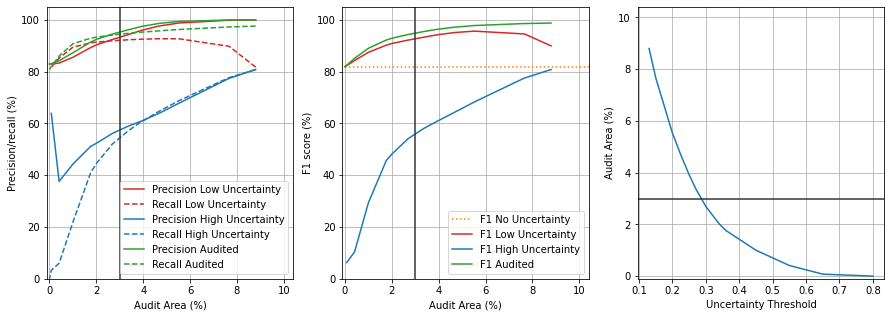

In [100]:
trainer.plotUncertaintyAA()

In [101]:
trainer.getOptimalUncertaintyThreshold()

ic| bounds: (0.0015, 0.9985)
c:\Users\jchamorro\Anaconda3\envs\tf2\lib\site-packages\scipy\optimize\_minimize.py:783: RuntimeWarning: Method 'bounded' does not support relative tolerance in x; defaulting to absolute tolerance.
  warn("Method 'bounded' does not support relative tolerance in x; "


0.38232011321635484
threshold 0.38232011321635484
(53305563,) (53305563,)


ic| label_current_deforestation_test_classified_incorrect.shape: (828438,)
    predicted_test_classified_incorrect.shape: (828438,)
ic| TP_H + FN_H + FP_H + TN_H: 828438
    len(label_mask_current_deforestation_test): 54134001
ic| TP_H + FN_H + FP_H + TN_H: 828438
    len(label_mask_current_deforestation_test): 54134001


cm_correct [[52632988    72129]
 [   55063   545383]]
cm_incorrect [[643999  50175]
 [ 84967  49297]]
[0.88319417 0.9082965  0.74231057 0.01530347 0.4955867  0.36716469]
0.6176798867836452
threshold 0.6176798867836452
(54052409,) (54052409,)


ic| label_current_deforestation_test_classified_incorrect.shape: (81592,)
    predicted_test_classified_incorrect.shape: (81592,)
ic| TP_H + FN_H + FP_H + TN_H: 81592
    len(label_mask_current_deforestation_test): 54134001
ic| TP_H + FN_H + FP_H + TN_H: 81592
    len(label_mask_current_deforestation_test): 54134001


cm_correct [[53210181   121910]
 [  126075   594243]]
cm_incorrect [[66806   394]
 [13955   437]]
[0.82977101 0.82497314 0.808813   0.00150722 0.52587244 0.03036409]
0.23685977356729035
threshold 0.23685977356729035
(51799265,) (51799265,)


ic| label_current_deforestation_test_classified_incorrect.shape: (2334736,)
    predicted_test_classified_incorrect.shape: (2334736,)


cm_correct [[51340271    12795]
 [   32710   413489]]


ic| TP_H + FN_H + FP_H + TN_H: 2334736
    len(label_mask_current_deforestation_test): 54134001
ic| TP_H + FN_H + FP_H + TN_H: 2334736
    len(label_mask_current_deforestation_test): 54134001


cm_incorrect [[1936716  109509]
 [ 107320  181191]]
[0.9699848  0.9266919  0.56279212 0.04312883 0.62329205 0.62802112]
0.266693963054163
threshold 0.266693963054163
(52262403,) (52262403,)


ic| label_current_deforestation_test_classified_incorrect.shape: (1871598,)
    predicted_test_classified_incorrect.shape: (1871598,)


cm_correct [[51744937    26011]
 [   37431   454024]]


ic| TP_H + FN_H + FP_H + TN_H: 1871598
    len(label_mask_current_deforestation_test): 54134001
ic| TP_H + FN_H + FP_H + TN_H: 1871598
    len(label_mask_current_deforestation_test): 54134001


cm_incorrect [[1532050   96293]
 [ 102599  140656]]
[0.94581437 0.92383636 0.61796355 0.03457343 0.59361297 0.5782245 ]
0.3074958481642873
threshold 0.3074958481642873
(52755152,) (52755152,)


ic| label_current_deforestation_test_classified_incorrect.shape: (1378849,)
    predicted_test_classified_incorrect.shape: (1378849,)
ic| TP_H + FN_H + FP_H + TN_H: 1378849
    len(label_mask_current_deforestation_test): 54134001
ic| TP_H + FN_H + FP_H + TN_H: 1378849
    len(label_mask_current_deforestation_test): 54134001


cm_correct [[52172688    42791]
 [   43993   495680]]
cm_incorrect [[1104299   79513]
 [  96037   99000]]
[0.9205324  0.91848212 0.67466075 0.02547103 0.55458146 0.50759599]
0.3360761742309462
threshold 0.3360761742309462
(53009854,) (53009854,)


ic| label_current_deforestation_test_classified_incorrect.shape: (1124147,)
    predicted_test_classified_incorrect.shape: (1124147,)
ic| TP_H + FN_H + FP_H + TN_H: 1124147
    len(label_mask_current_deforestation_test): 54134001
ic| TP_H + FN_H + FP_H + TN_H: 1124147
    len(label_mask_current_deforestation_test): 54134001


cm_correct [[52390018    53612]
 [   48127   518097]]
cm_incorrect [[886969  68692]
 [ 91903  76583]]
[0.90622502 0.9150036  0.70517211 0.02076601 0.52715884 0.45453628]
0.2873230305118544
threshold 0.2873230305118544
(52532708,) (52532708,)


ic| label_current_deforestation_test_classified_incorrect.shape: (1601293,)
    predicted_test_classified_incorrect.shape: (1601293,)
ic

cm_correct [[51980618    34520]
 [   40797   476773]]
cm_incorrect [[1296369   87784]
 [  99233  117907]]


| TP_H + FN_H + FP_H + TN_H: 1601293
    len(label_mask_current_deforestation_test): 54134001
ic| TP_H + FN_H + FP_H + TN_H: 1601293
    len(label_mask_current_deforestation_test): 54134001


[0.9324849  0.92117588 0.64892679 0.02958017 0.57322391 0.54299991]
0.2871497918317989
threshold 0.2871497918317989
(52530539,) (52530539,)


ic| label_current_deforestation_test_classified_incorrect.shape: (1603462,)
    predicted_test_classified_incorrect.shape: (1603462,)
ic

cm_correct [[51978736    34444]
 [   40767   476592]]
cm_incorrect [[1298251   87860]
 [  99263  118088]]


| TP_H + FN_H + FP_H + TN_H: 1603462
    len(label_mask_current_deforestation_test): 54134001
ic| TP_H + FN_H + FP_H + TN_H: 1603462
    len(label_mask_current_deforestation_test): 54134001


[0.93259966 0.92120172 0.64868043 0.02962024 0.57338746 0.54330553]
0.27933636050679017
threshold 0.27933636050679017
(52433256,) (52433256,)


ic| label_current_deforestation_test_classified_incorrect.shape: (1700745,)
    predicted_test_classified_incorrect.shape: (1700745,)
ic

cm_correct [[51894020    31245]
 [   39562   468429]]
cm_incorrect [[1382967   91059]
 [ 100468  126251]]


| TP_H + FN_H + FP_H + TN_H: 1700745
    len(label_mask_current_deforestation_test): 54134001
ic| TP_H + FN_H + FP_H + TN_H: 1700745
    len(label_mask_current_deforestation_test): 54134001


[0.93746923 0.92212067 0.63756993 0.03141732 0.58097188 0.55686114]
0.28469958897592046
threshold 0.28469958897592046
(52500682,) (52500682,)


ic| label_current_deforestation_test_classified_incorrect.shape: (1633319,)
    predicted_test_classified_incorrect.shape: (1633319,)
ic

cm_correct [[51952836    33398]
 [   40391   474057]]
cm_incorrect [[1324151   88906]
 [  99639  120623]]


| TP_H + FN_H + FP_H + TN_H: 1633319
    len(label_mask_current_deforestation_test): 54134001
ic| TP_H + FN_H + FP_H + TN_H: 1633319
    len(label_mask_current_deforestation_test): 54134001


[0.9341853  0.92148672 0.64523009 0.03017178 0.57568642 0.54763418]
0.2851641289611872
threshold 0.2851641289611872
(52506394,) (52506394,)


ic| label_current_deforestation_test_classified_incorrect.shape: (1627607,)
    predicted_test_classified_incorrect.shape: (1627607,)
ic

cm_correct [[51957769    33615]
 [   40470   474540]]
cm_incorrect [[1319218   88689]
 [  99560  120140]]


| TP_H + FN_H + FP_H + TN_H: 1627607
    len(label_mask_current_deforestation_test): 54134001
ic| TP_H + FN_H + FP_H + TN_H: 1627607
    len(label_mask_current_deforestation_test): 54134001


[0.93384892 0.921419   0.64588749 0.03006626 0.57530324 0.5468366 ]
0.28565459612840655
threshold 0.28565459612840655
(52512444,) (52512444,)


ic| label_current_deforestation_test_classified_incorrect.shape: (1621557,)
    predicted_test_classified_incorrect.shape: (1621557,)
ic| TP_H + FN_H + FP_H + TN_H: 1621557
    len(label_mask_current_deforestation_test): 54134001
ic| TP_H 

cm_correct [[51962990    33837]
 [   40560   475057]]
cm_incorrect [[1313997   88467]
 [  99470  119623]]


+ FN_H + FP_H + TN_H: 1621557
    len(label_mask_current_deforestation_test): 54134001


[0.93350875 0.92133696 0.64659117 0.0299545  0.57486184 0.54599188]
0.2855187370125625
threshold 0.2855187370125625
(52510729,) (52510729,)


ic| label_current_deforestation_test_classified_incorrect.shape: (1623272,)
    predicted_test_classified_incorrect.shape: (1623272,)
ic

cm_correct [[51961506    33776]
 [   40528   474919]]
cm_incorrect [[1315481   88528]
 [  99502  119761]]


| TP_H + FN_H + FP_H + TN_H: 1623272
    len(label_mask_current_deforestation_test): 54134001
ic| TP_H + FN_H + FP_H + TN_H: 1623272
    len(label_mask_current_deforestation_test): 54134001


[0.93360265 0.9213731  0.64640334 0.02998618 0.57497515 0.54619794]
0.28543660399602105
threshold 0.28543660399602105
(52509722,) (52509722,)


ic| label_current_deforestation_test_classified_incorrect.shape: (1624279,)
    predicted_test_classified_incorrect.shape: (1624279,)
ic

cm_correct [[51960659    33728]
 [   40518   474817]]
cm_incorrect [[1316328   88576]
 [  99512  119863]]


| TP_H + FN_H + FP_H + TN_H: 1624279
    len(label_mask_current_deforestation_test): 54134001
ic| TP_H + FN_H + FP_H + TN_H: 1624279
    len(label_mask_current_deforestation_test): 54134001


[0.93367745 0.92137542 0.64626451 0.03000478 0.57505073 0.54638405]
0.2853803505137543
threshold 0.2853803505137543
(52508994,) (52508994,)


ic| label_current_deforestation_test_classified_incorrect.shape: (1625007,)
    predicted_test_classified_incorrect.shape: (1625007,)
ic

cm_correct [[51960015    33701]
 [   40510   474768]]
cm_incorrect [[1316972   88603]
 [  99520  119912]]


| TP_H + FN_H + FP_H + TN_H: 1625007
    len(label_mask_current_deforestation_test): 54134001
ic| TP_H + FN_H + FP_H + TN_H: 1625007
    len(label_mask_current_deforestation_test): 54134001


[0.93372064 0.92138224 0.64619782 0.03001823 0.57507613 0.54646542]
0.28546994156306343
threshold 0.28546994156306343
(52510150,) (52510150,)


ic| label_current_deforestation_test_classified_incorrect.shape: (1623851,)
    predicted_test_classified_incorrect.shape: (1623851,)
ic

cm_correct [[51961015    33747]
 [   40524   474864]]
cm_incorrect [[1315972   88557]
 [  99506  119816]]


| TP_H + FN_H + FP_H + TN_H: 1623851
    len(label_mask_current_deforestation_test): 54134001
ic| TP_H + FN_H + FP_H + TN_H: 1623851
    len(label_mask_current_deforestation_test): 54134001
ic| self.threshold_optimal: 0.28546994156306343


[0.9336487  0.92137186 0.64632848 0.02999688 0.57500732 0.54630178]


In [102]:
trainer.getUncertaintyMetricsFromOptimalThreshold()

threshold 0.28546994156306343
(52510150,) (52510150,)


ic| label_current_deforestation_test_classified_incorrect.shape: (1623851,)
    predicted_test_classified_incorrect.shape: (1623851,)
ic

cm_correct [[51961015    33747]
 [   40524   474864]]
cm_incorrect [[1315972   88557]
 [  99506  119816]]


| TP_H + FN_H + FP_H + TN_H: 1623851
    len(label_mask_current_deforestation_test): 54134001
ic| TP_H + FN_H + FP_H + TN_H: 1623851
    len(label_mask_current_deforestation_test): 54134001


[0.9336487  0.92137186 0.64632848 0.02999688 0.57500732 0.54630178]
threshold 0.28546994156306343
(54134001,) (54134001,)


ic| self.m_optimal: {'AA': array([0.02999688]),
                     'f1': 81.93,
                     'f1_H': array([0.56028712]),
                     'f1_L': array([0.92746966]),
                     'precision_H': array([0.57500732]),
                     'precision_L': array([0.9336487]),
                     'recall_H': array([0.54630178]),
                     'recall_L': array([0.92137186]),
                     'recall_Ltotal': array([0.64632848])}
ic| self.m_audited_optimal: {'f1': array([0.94922138]),
                             'precision': array([0.95363996]),
                             'recall': array([0.94484354])}


cm_audited [[53365544    33747]
 [   40524   694186]]
[0.95363996 0.94484354]


{'metrics': {'precision_L': array([0.9336487]),
  'recall_L': array([0.92137186]),
  'recall_Ltotal': array([0.64632848]),
  'AA': array([0.02999688]),
  'precision_H': array([0.57500732]),
  'recall_H': array([0.54630178]),
  'f1_L': array([0.92746966]),
  'f1_H': array([0.56028712]),
  'f1': 81.93},
 'metrics_audited': {'precision': array([0.95363996]),
  'recall': array([0.94484354]),
  'f1': array([0.94922138])},
 'exp': 185}